In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
from dca_simulator.data_loader import load_price_data
from dca_simulator.data_processing import data_process
from dca_simulator.strategies import dca_DD, dca_standard
from dca_simulator.backtest import perf_backtest
from dca_simulator.metrics import compute_roi, compute_cagr

raw = load_price_data("AAPL", "2000-01-01", "2025-01-01")
raw.head()

/Users/maxmilde/Library/Mobile Documents/com~apple~CloudDocs/University/Prague/Master/Data Processing in Python/Project_python/dca_simulator/data_loader.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close
Date,
2000-01-03,0.839280
2000-01-04,0.768521
2000-01-05,0.779767
2000-01-06,0.712287
2000-01-07,0.746027


In [23]:
clean = data_process(raw)
clean.shape

(6289, 1)

In [30]:
result1 = perf_backtest(clean, dca_DD, monthly_contrib=150)
result.tail()


ROI: 19321.41%
CAGR: 23.53%


Price,Close,shares_total,invested_total,portf_value,profit_loss
Date,,,,,
2024-08-01,216.886932,31239.033010,44400.0,6.775338e+06,6.730938e+06
2024-09-01,221.523300,31239.710140,44550.0,6.920324e+06,6.875774e+06
2024-10-01,224.944046,31240.376972,44700.0,7.027337e+06,6.982637e+06
2024-11-01,221.662491,31241.053677,44850.0,6.924970e+06,6.880120e+06
2024-12-01,238.511246,31241.682578,45000.0,7.451493e+06,7.406493e+06


In [31]:
result2 = perf_backtest(clean, dca_standard, monthly_contrib=150)
result.tail()

ROI: 16458.87%
CAGR: 22.74%


Price,Close,shares_total,invested_total,portf_value,profit_loss
Date,,,,,
2024-08-01,216.886932,31239.033010,44400.0,6.775338e+06,6.730938e+06
2024-09-01,221.523300,31239.710140,44550.0,6.920324e+06,6.875774e+06
2024-10-01,224.944046,31240.376972,44700.0,7.027337e+06,6.982637e+06
2024-11-01,221.662491,31241.053677,44850.0,6.924970e+06,6.880120e+06
2024-12-01,238.511246,31241.682578,45000.0,7.451493e+06,7.406493e+06


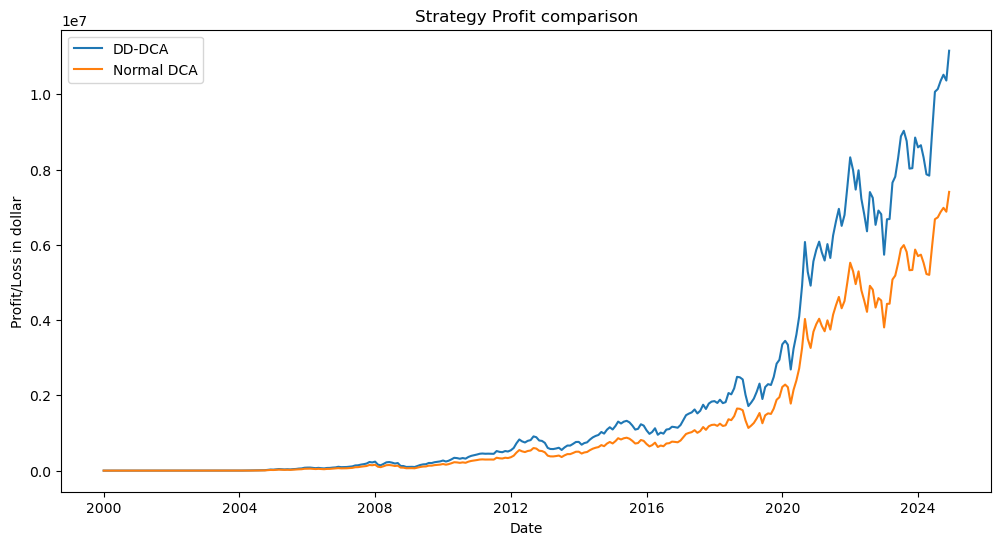

In [32]:
plt.figure(figsize=(12,6))
plt.plot(result1.index, result1["profit_loss"], label="DD-DCA")
plt.plot(result2.index, result2["profit_loss"], label="Normal DCA")
plt.title("Strategy Profit comparison")
plt.xlabel("Date")
plt.ylabel("Profit/Loss in dollar")
plt.legend()
plt.show()

